In [43]:
# Warmup 1:  If I toss a coin 10 times, and asked you to guess 
# how many times it comes up "heads", 

# What is the expected probability?  
# What results would be typical?
# What results would be make you think the coin was not fair? 

In [ ]:
# The content of today's lecture will NOT be tested on the final exam. 

#  December 13th: Pseudo-randomness

Learning Objectives:

 - Create pseudo-random sequences using random.choice() in Series and DataFrames
 - Use `seeds` to control pseudo-random sequences
 - Reason about the `significance` of an experimental results Using the Law of Large Numbers
 - Use Pandas to compute experimental results
  

In [44]:
import pandas as pd
from pandas import Series, DataFrame

import numpy as np

In [45]:
import matplotlib 
matplotlib.rcParams["font.size"] = 16
%matplotlib inline

In [46]:
# ignore this cell - it makes the emphasized text red and uses the full width of the screen
from IPython.core.display import HTML
HTML('<style>em { color: red; }</style> <style>.container {width:100% !important; }</style>')

## Pseudo-randomness

What is it?
 - Looks like randomness
 - Usually involve very long strings of numbers, pick parts of those strings unpredictably to look like random numbers

Why do computers use it?
 - A computer is actually really bad at generating "true" randomness
 
How do computers do it?  (Traditional Way)
- Start with a seed number
- Plug it into a formula, print the result
- Use the result to generate the next number



### Numpy also has Random selection from a list

In [49]:
import numpy
from numpy.random import choice

#choice(<some list>)
numpy.random.choice(["rock","paper","scissors"])


'rock'

In [58]:
# choice(n)....returns an int between 0 and n-1, inclusive
numpy.random.choice(17)

13

### Make lots of choices 
- size parameter for choice function

In [53]:
numpy.random.choice(["rock","paper","scissors"], size=5)

array(['scissors', 'scissors', 'rock', 'paper', 'paper'], dtype='<U8')

In [60]:
#Note: optional parameter replace
numpy.random.choice(["rock","paper","scissors"], size=2, replace=False) 


array(['scissors', 'paper'], dtype='<U8')

----
### Multidimensional random numpy array of random choices
- numpy.random.choice(["rock", "paper", "scissors"], size = (ROWS, COLUMNS))
- size = (ROWS, COLUMNS))

In [61]:
choice(["rock","paper","scissors"], size=(5,2))

array([['scissors', 'scissors'],
       ['scissors', 'rock'],
       ['paper', 'scissors'],
       ['scissors', 'scissors'],
       ['paper', 'rock']], dtype='<U8')

----
### Pandas allows you to create a Series or DataFrame from Random values

In [62]:
Series(numpy.random.choice(["rock","paper","scissors"], size=5))

0       paper
1        rock
2    scissors
3        rock
4        rock
dtype: object

In [63]:
#DataFrame(from a LIST of LISTS)
DataFrame(choice(["rock","paper","scissors"], size=(5,2)))

,0,1
0,scissors,rock
1,paper,scissors
2,rock,scissors
3,rock,scissors
4,scissors,paper


----
### Exploring Bias - is this fair?

<AxesSubplot:>

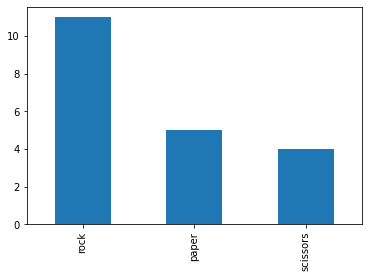

In [34]:
s = Series(choice(["rock","paper","scissors"], size=20))
vc = s.value_counts()
vc.plot.bar()

### Sorted by Index name

<AxesSubplot:>

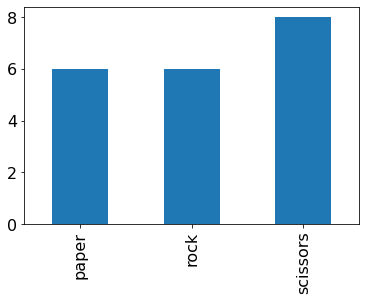

In [19]:
s = Series(choice(["rock","paper","scissors"], size=20))
vc = s.value_counts()
vc = vc.sort_index()
vc.plot.bar()

----
### We can choose the column arrangement

<AxesSubplot:>

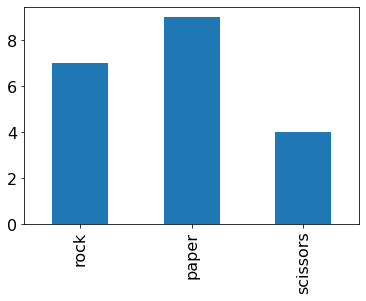

In [20]:
s = Series(choice(["rock","paper","scissors"], size=20))
vc = s.value_counts()
vc = vc[["rock","paper","scissors"]]
vc.plot.bar()

----
## Law of Large Numbers

### Small number of trials: expect lots of variation in results
### Large number of trials: results should look much closer to the expected probability

rock         9983
paper       10049
scissors     9968
dtype: int64


<AxesSubplot:>

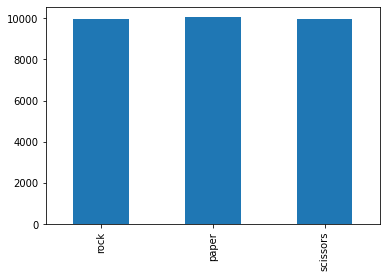

In [38]:
#Law of Large Numbers

s = Series(choice(["rock","paper","scissors"], size=30000))
vc = s.value_counts()
vc = vc[["rock","paper","scissors"]]
print(vc)
vc.plot.bar()

----
### Numpy.random.choice allows us to Control the probability of selection

rock         29710
paper        60099
scissors    210191
dtype: int64


<AxesSubplot:>

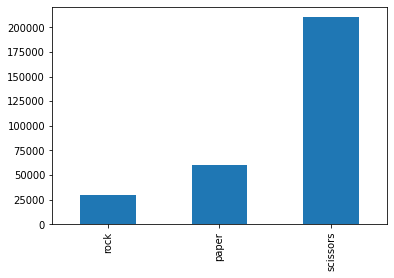

In [66]:
s = Series(choice(["rock", "paper", "scissors"], size = 300000, p = [0.10, 0.20, 0.70]))
vc = s.value_counts()
vc = vc[ ["rock", "paper", "scissors"] ]
print(vc)
vc.plot.bar()

----
### Random integer shortcut

In [69]:
Series(choice(17, size = 5))

0     1
1    11
2     5
3     8
4    12
dtype: int64

## Seeding

### When a pseudorandom number generator uses a seed, it always gives the same "random" results

----
### A Code Segment with a Sneaky Error

In [78]:
# Change over time
s = Series(choice(10,size=5))
print(s)
percents = []
for i in range(1, len(s)):
    diff = 100 * (s[i] / s[i-1] -1)
    percents.append(diff)
    print(i, percents)

# Series(percents).plot.line()

#What was the error?  

0    6
1    3
2    8
3    4
4    0
dtype: int64
1 [-50.0]
2 [-50.0, 166.66666666666666]
3 [-50.0, 166.66666666666666, -50.0]
4 [-50.0, 166.66666666666666, -50.0, -100.0]


In [79]:
np.random.seed(200)
choice(1000, size = 3)

array([794, 617, 784])

In [80]:
choice(1000, size = 3)

array([836, 810, 695])

In [27]:
np.random.seed(200)
choice(1000, size = 6) #Notice all 6 numbers are the same as before!

array([794, 617, 784, 836, 810, 695])

----
### Seeding with time

In [31]:
import time
time.time()
now = int(time.time())
now
np.random.seed(now)
choice(1000, size=3)
print("Seeding with:", now) #Report which seed we used just in case we want to replicate that random trial

Seeding with: 1619799159


----
## Significance - Does the data support drawing that conclusion?

In [88]:
# does this trial results seem reasonable to you?
trials = 10
flips = 3
df = DataFrame(choice([1,0], size = (trials,flips)))
df

,0,1,2
0,1,1,0
1,0,1,0
2,0,0,1
3,1,1,0
4,0,0,0
5,1,0,1
6,1,0,0
7,1,1,1
8,1,0,0
9,1,1,0


In [33]:
# reminder that default is axis='rows'
# axis='columns' adds across the columns
# how many HEADS results in each trial
df.sum(axis='columns') 

0    1
1    1
2    3
3    1
4    1
5    3
6    2
7    1
8    1
9    2
dtype: int64

----
### Is it reasonable to toss a coin 100 times and get 60 heads, 40 tails? 

In [86]:
trials = 10000
flips = 100
df = DataFrame(choice([1,0], size = (trials,flips)))
df.sum(axis='columns')

0       56
1       55
2       51
3       49
4       50
        ..
9995    42
9996    47
9997    47
9998    48
9999    53
Length: 10000, dtype: int64

In [87]:
counts = df.sum(axis='columns')

In [36]:
counts[counts <= 40]

15      39
29      40
83      40
90      38
119     40
        ..
9822    36
9825    40
9834    40
9890    39
9968    39
Length: 286, dtype: int64

In [39]:
extremes = counts[(counts<=40) | (counts >=60)]
len(extremes)

584

In [40]:
#Get as a percentage
len(extremes)/trials * 100

5.84

<AxesSubplot:ylabel='Frequency'>

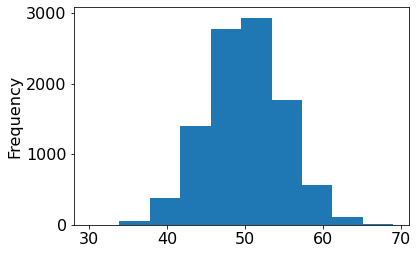

In [41]:
counts.plot.hist()

<AxesSubplot:ylabel='Frequency'>

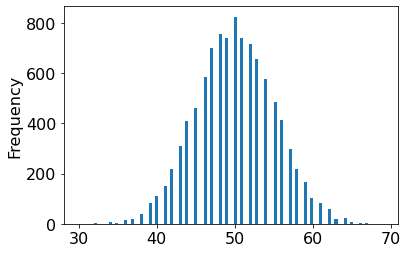

In [42]:
counts.plot.hist(bins=100)

### Using normal: mean, standard deviations, size

<AxesSubplot:ylabel='Frequency'>

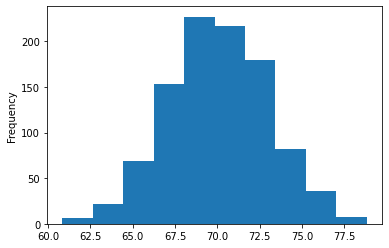

In [85]:
male_us_height = Series(numpy.random.normal(70, 3, size=1000))
male_us_height.plot.hist()